In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn import tree

In [2]:
X,y = load_breast_cancer(return_X_y= True)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_training_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_train, y_training_pred)

1.0

In [7]:
accuracy_score(y_test, y_test_pred)

0.9385964912280702

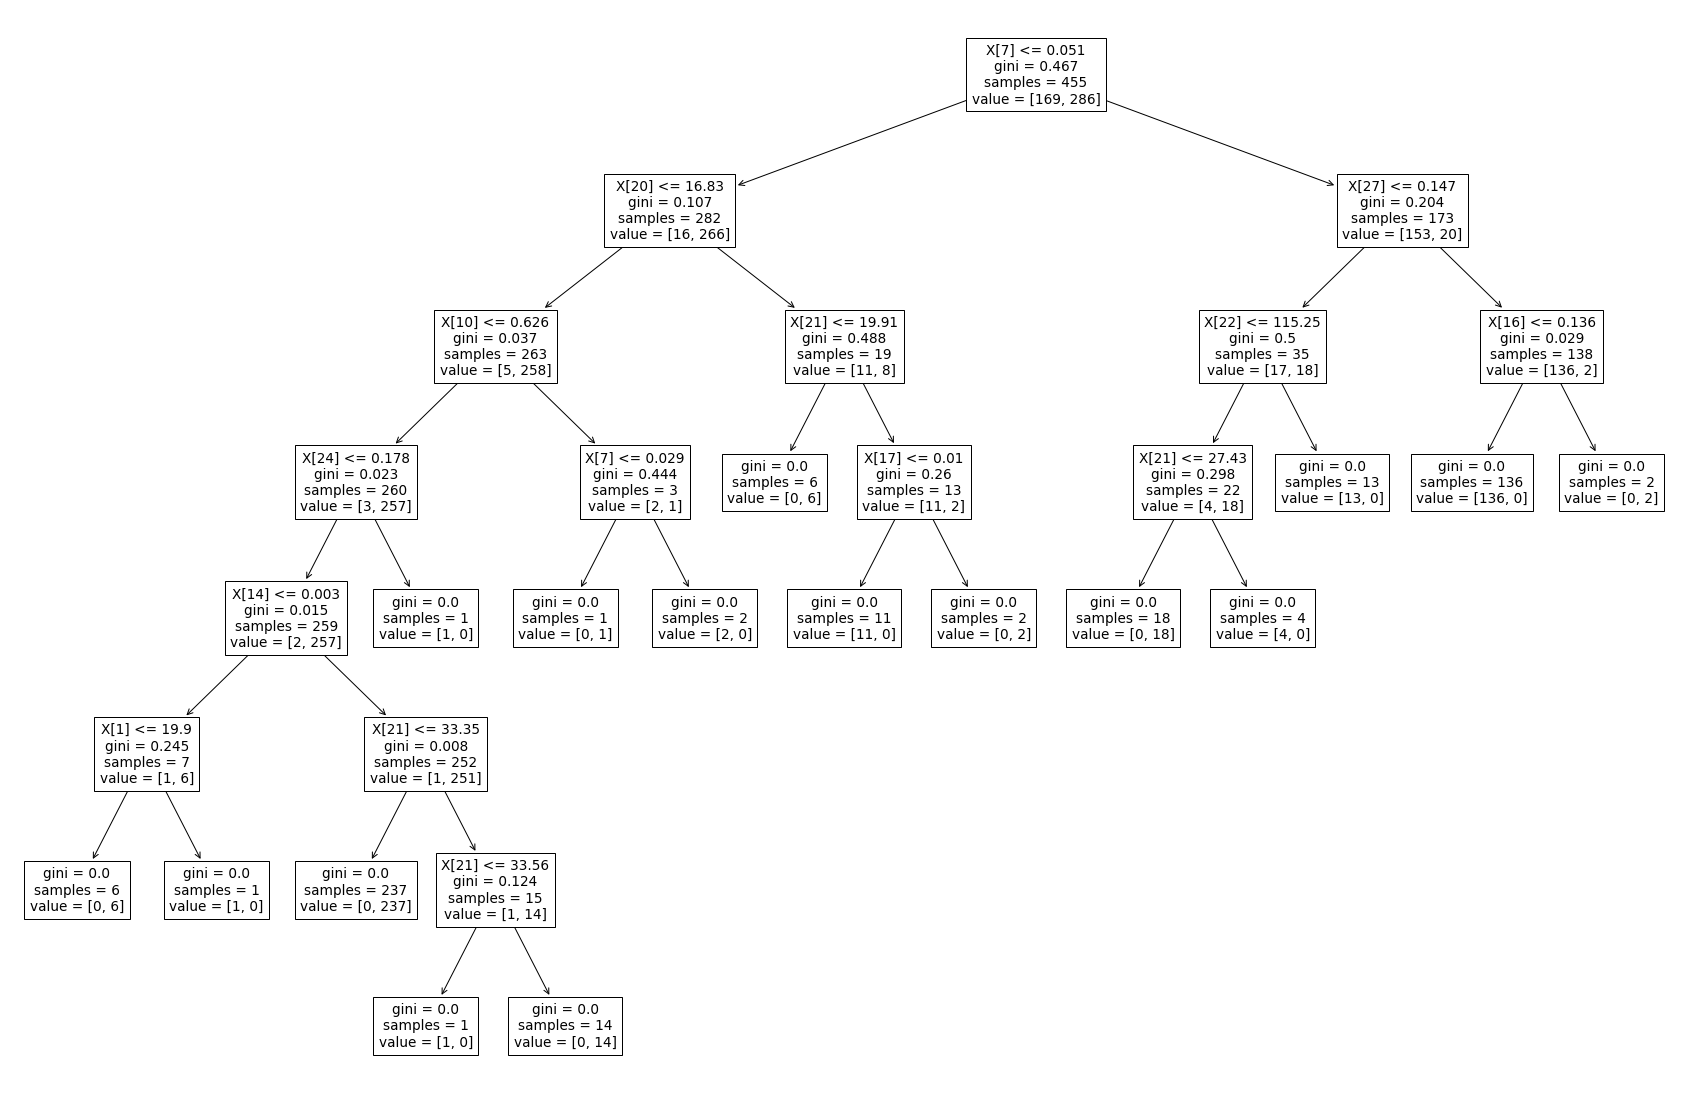

In [8]:
plt.figure(figsize = (30,20))
tree.plot_tree(dtc)
plt.show()

### Post Pruning operations

In [9]:
# cost complexity pruning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
path = dtc.cost_complexity_pruning_path(X_train, y_train)

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [11]:
ccp_alphas

array([0.        , 0.00218083, 0.0029304 , 0.00431133, 0.00559513,
       0.00743872, 0.0086638 , 0.01291987, 0.01438561, 0.02404453,
       0.02442056, 0.0306549 , 0.3228506 ])

In [12]:
impurities

array([0.        , 0.00872332, 0.01165373, 0.01596506, 0.02156019,
       0.0289989 , 0.0376627 , 0.05058258, 0.06496819, 0.08901272,
       0.11343328, 0.14408818, 0.46693878])

In [13]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier (ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [14]:
clfs

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00218083075225933),
 DecisionTreeClassifier(ccp_alpha=0.0029304029304029304),
 DecisionTreeClassifier(ccp_alpha=0.004311334641004935),
 DecisionTreeClassifier(ccp_alpha=0.005595128280123898),
 DecisionTreeClassifier(ccp_alpha=0.007438715131022823),
 DecisionTreeClassifier(ccp_alpha=0.008663799968147794),
 DecisionTreeClassifier(ccp_alpha=0.012919873648618588),
 DecisionTreeClassifier(ccp_alpha=0.014385614385614387),
 DecisionTreeClassifier(ccp_alpha=0.024044526901669756),
 DecisionTreeClassifier(ccp_alpha=0.02442055678423035),
 DecisionTreeClassifier(ccp_alpha=0.030654899499189175),
 DecisionTreeClassifier(ccp_alpha=0.32285060033114216)]

#### Last node in DT is 1 and ccp_alpha is 0.32285

In [15]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [16]:
train_scores

[1.0,
 0.9956043956043956,
 0.9934065934065934,
 0.9912087912087912,
 0.989010989010989,
 0.9846153846153847,
 0.9802197802197802,
 0.967032967032967,
 0.9582417582417583,
 0.9296703296703297,
 0.9230769230769231,
 0.9208791208791208,
 0.6285714285714286]

In [17]:
test_scores

[0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9298245614035088,
 0.9122807017543859,
 0.8947368421052632,
 0.6228070175438597]

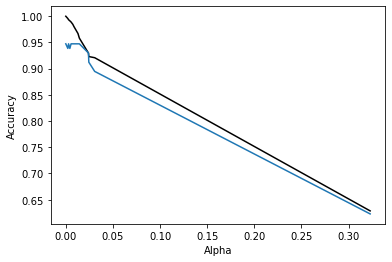

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, train_scores, color = 'black', label = 'Train')
ax.plot(ccp_alphas, test_scores, label = 'Test')
plt.show()

#### if we follow bias, vaiance and tradeoff, we will choose that point, which will have low bias and low variance

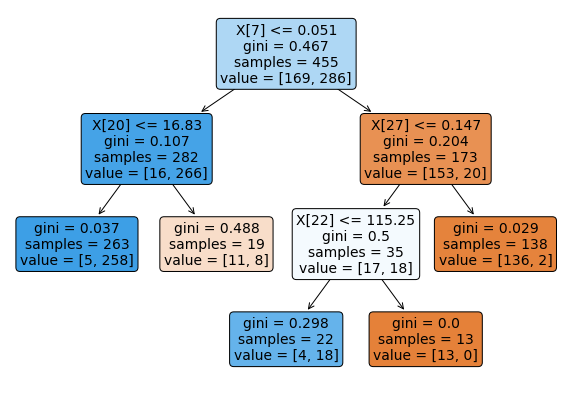

In [19]:
clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.02)
clf.fit(X_train, y_train)
plt.figure(figsize = (10,7))
tree.plot_tree(clf, rounded = True, filled = True)
plt.show()

In [20]:
accuracy_score(y_test, clf.predict(X_test))

0.9473684210526315

## GridsearchCV

In [21]:
# grid_param = {"criterion" : ['gini', 'entropy'],
#              'splitter' :['best', 'random'],
#               'max_depth':range(2,50,1),
#               'min_samples_split': range(2,20,1),
#               'min_samples_leaf': range(1,15,1)}

In [22]:
# %%time
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, cv = 5)
# grid_search.fit(X_train, y_train)

In [23]:
# print (grid_search.best_params_)

In [24]:
# {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 11, 'splitter': 'random'}

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc_hype = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 5, min_samples_split = 11, splitter = 'random')

In [27]:
dtc_hype.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=11, splitter='random')

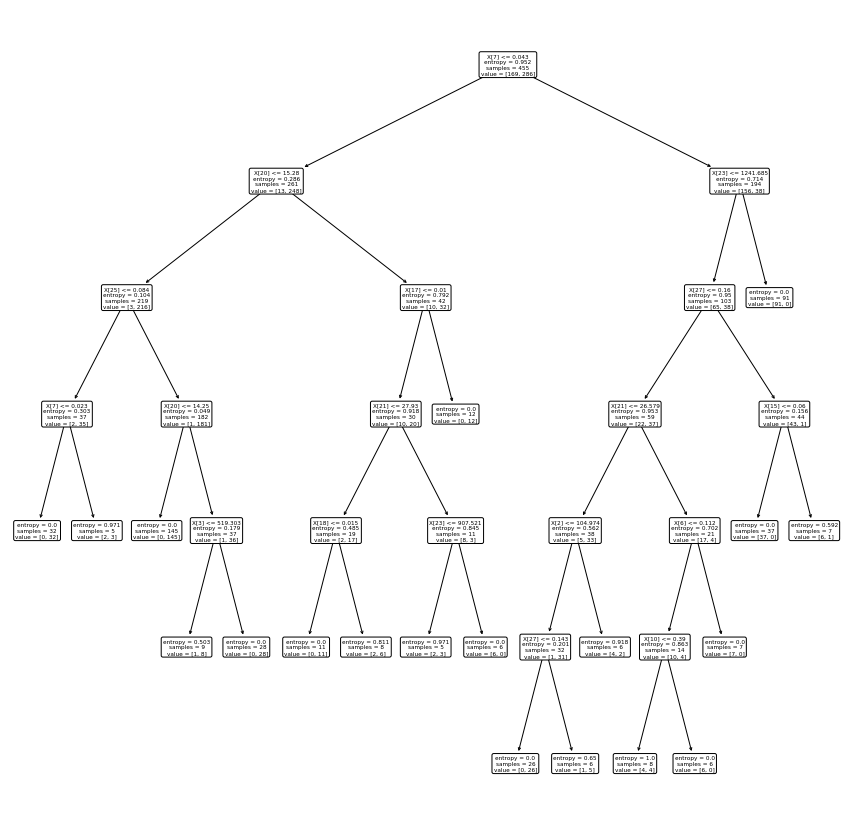

In [28]:
plt.figure(figsize = (15,15))
tree.plot_tree(dtc_hype, rounded = True)
plt.show()

In [29]:
y_pred = dtc_hype.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473